In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import torch.optim as optim
import pandas as pd
from tabulate import tabulate

# Task 1 : Ascending the Gradient Descent

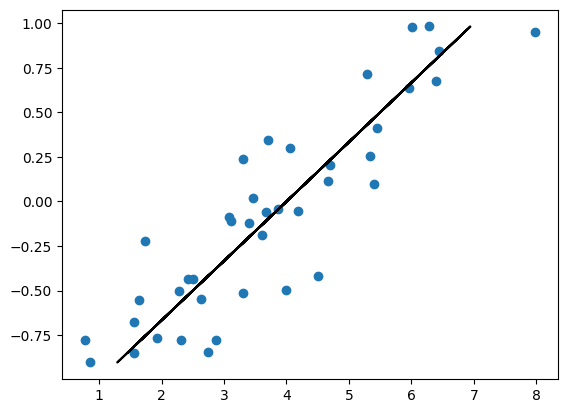

In [2]:
np.random.seed(45)
num_samples = 40
    
# Generate data
x1 = np.random.uniform(-1, 1, num_samples)
f_x = 3*x1 + 4
eps = np.random.randn(num_samples)
y = f_x + eps
plt.scatter(y,x1)
plt.plot(f_x,x1, color = 'black')

#
#
#
#
#

## 1. Use ```torch.autograd``` to find the true gradient on the above dataset using linear regression (in the form $\theta_1x + \theta_0$) for any given values of $(\theta_0,\theta_1)$.

In [3]:
x_tensor = torch.tensor(x1).view(-1, 1)    #conversion of input and output data to tensors
y_tensor = torch.tensor(y)

theta_0 = torch.tensor([0.1], requires_grad=True)
theta_1 = torch.tensor([0.1], requires_grad=True)     # initialising thetas

def model(x):
    return theta_0 + theta_1 * x                         # def of the linear model

def loss_fn(pred, target):
    return torch.mean((pred - target) ** 2)               # loss function as the mean of squared losses

predictions = model(x_tensor)                               # Forward pass

loss = loss_fn(predictions, y_tensor)               # Compute loss
loss.backward()

grad_theta_0 = theta_0.grad.item()
grad_theta_1 = theta_1.grad.item()

print(f"True Gradient with respect to theta_0: {grad_theta_0}")
print(f"True Gradient with respect to theta_1: {grad_theta_1}")





True Gradient with respect to theta_0: -7.263991832733154
True Gradient with respect to theta_1: 0.6769246459007263


#
#
#
## 2.Using the same $(\theta_0,\theta_1)$ as above, calculate the stochastic gradient for all points in the dataset. Then, find the average of all those gradients and show that the stochastic gradient is a good estimate of the true gradient.

In [4]:
individual_gradients_theta_0 = []
individual_gradients_theta_1 = []

for i in range(num_samples):            #iterateing through all points

    x_i = x_tensor[i].view(1, 1)
    y_i = y_tensor[i]


    theta_0_i = torch.tensor([0.0], requires_grad=True)
    theta_1_i = torch.tensor([0.0], requires_grad=True)

    # Define the model
    def model_i(x):
        return theta_0_i + theta_1_i * x

    prediction_i = model_i(x_i)
    loss_i = loss_fn(prediction_i, y_i)

    loss_i.backward()

    grad_theta_0_i = theta_0_i.grad.item()
    grad_theta_1_i = theta_1_i.grad.item()

    individual_gradients_theta_0.append(grad_theta_0_i)
    individual_gradients_theta_1.append(grad_theta_1_i)

gradients_df = pd.DataFrame({
    'Gradient w.r.t theta_0': individual_gradients_theta_0,
    'Gradient w.r.t theta_1': individual_gradients_theta_1
})

table = tabulate(gradients_df, headers='keys', tablefmt='psql')


print(table)





+----+--------------------------+--------------------------+
|    |   Gradient w.r.t theta_0 |   Gradient w.r.t theta_1 |
|----+--------------------------+--------------------------|
|  0 |                -12.0061  |               -11.7422   |
|  1 |                -10.8165  |                -1.0718   |
|  2 |                 -4.998   |                 2.18465  |
|  3 |                 -5.48429 |                 4.63654  |
|  4 |                 -6.22548 |                 0.691408 |
|  5 |                 -8.3823  |                 0.455864 |
|  6 |                 -1.70171 |                 1.53657  |
|  7 |                 -3.111   |                 2.09479  |
|  8 |                 -3.84757 |                 2.95531  |
|  9 |                -10.6868  |                -2.72282  |
| 10 |                -10.5658  |                -7.5267   |
| 11 |                 -8.11855 |                -2.43723  |
| 12 |                -12.5773  |               -12.3439   |
| 13 |                 -

In [5]:
print("\n\n", f"Average of Stochastic Gradient with respect to theta_0 = {np.mean(individual_gradients_theta_0)}","\n",f"Average of Stochastic Gradient with respect to theta_1 = {np.mean(individual_gradients_theta_1)}")




 Average of Stochastic Gradient with respect to theta_0 = -7.4470539569854735 
 Average of Stochastic Gradient with respect to theta_1 = -1.02530176602304


#
#
#

#### 3. Implement full-batch, mini-batch and stochastic gradient descent. Calculate the average number of iterations required for each method to get sufficiently close to the optimal solution, where "sufficiently close" means within a distance of $\epsilon$ (or $\epsilon$-neighborhood)  from the minimum value of the loss function. Visualize the convergence process for 15 epochs. Choose $\epsilon = 0.001$ for convergence criteria. Which optimization process takes a larger number of epochs to converge, and why? Show the contour plots for different epochs (or show an animation/GIF) for visualisation of optimisation process. Also, make a plot for Loss v/s epochs for all the methods.

In [6]:
import numpy as np

# Define functions for predictions and loss computation
def predict(x, theta_0, theta_1):
    return theta_1 * x + theta_0

def compute_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Gradient Descent Function
def full_batch_gradient_descent(X, y, alpha=0.05, epsilon=1e-3, max_iter=1000):
    m, n = X.shape
    theta = np.random.randn(n, 1)
    loss_history = []
    iterations = 0
    
    for epoch in range(max_iter):
        predictions = X @ theta
        loss = np.mean((predictions - y) ** 2) / 2
        gradient = X.T @ (predictions - y) / m
        theta -= alpha * gradient
        loss_history.append(loss)
        iterations += 1
        
        if abs(loss - optimal_loss) < epsilon:
            break
    
    return {
        'epochs': epoch + 1,
        'iterations': iterations,
        'loss': np.array(loss_history),
        'optimal_loss': optimal_loss
    }

def mini_batch_gradient_descent(X, y, theta, batch_size=5, alpha=0.05, epsilon=1e-3, max_iter=1000):
    m, n = X.shape
    loss_history = []
    iterations = 0
    
    for epoch in range(max_iter):
        indices = np.random.permutation(m)
        X_shuffled = X[indices]
        y_shuffled = y[indices]

        for i in range(0, m, batch_size):
            X_batch = X_shuffled[i:i + batch_size]
            y_batch = y_shuffled[i:i + batch_size]
            
            predictions = X_batch @ theta
            loss = np.mean((predictions - y_batch) ** 2) / 2
            gradient = X_batch.T @ (predictions - y_batch) / len(X_batch)
            theta -= alpha * gradient
            loss_history.append(loss)
            iterations += 1
        
        if abs(loss - optimal_loss) < epsilon:
            break
    
    return {
        'epochs': epoch + 1,
        'iterations': iterations,
        'loss': np.array(loss_history),
        'optimal_loss': optimal_loss
    }

def stochastic_gradient_descent(X, y, theta, alpha=0.05, epsilon=1e-3, max_iter=1000):
    m, n = X.shape
    # theta = np.random.randn(n, 1)  # Optional: Uncomment if random initialization is desired
    loss_history = []
    iterations = 0
    
    for epoch in range(max_iter):
        indices = np.random.permutation(m)
        X_shuffled = X[indices]
        y_shuffled = y[indices]

        for i in range(m):
            X_i = X_shuffled[i:i + 1]
            y_i = y_shuffled[i:i + 1]

            predictions = X_i @ theta
            loss = np.mean((predictions - y_i) ** 2) / 2
            gradient = X_i.T @ (predictions - y_i)
            
            # Update theta directly without momentum
            theta -= alpha * gradient
            
            loss_history.append(loss)
            iterations += 1

        average_loss = np.mean(loss_history[-m:])  # Average loss for the epoch
        
        if abs(average_loss - optimal_loss) < epsilon:
            break
    
    return {
        'epochs': epoch + 1,
        'iterations': iterations,
        'loss': np.array(loss_history),
        'optimal_loss': optimal_loss
    }




X = np.c_[np.ones(num_samples), x1] 
y = y.reshape(-1, 1)  

# Compute optimal theta using the normal equation
theta_optimal = np.linalg.inv(X.T @ X) @ X.T @ y
optimal_loss = np.mean((X @ theta_optimal - y) ** 2) / 2

# Conduct quantitative comparison over 10 trials
num_trials = 20
results_full_batch = []
results_mini_batch = []
results_sgd = []

for _ in range(num_trials):
    # Initialize theta randomly for each trial
    # initial_theta = np.random.randn(2, 1)
    initial_theta = np.array([[0.0],
 [0.0]])
    
    # Run full-batch gradient descent
    result_full_batch = full_batch_gradient_descent(X, y, alpha=0.01, epsilon=1e-3, max_iter=2000)
    results_full_batch.append(result_full_batch)
    
    # Run mini-batch gradient descent
    result_mini_batch = mini_batch_gradient_descent(X, y, initial_theta, batch_size=5, alpha=0.01, epsilon=1e-3, max_iter=2000)
    results_mini_batch.append(result_mini_batch)
    
    # Run stochastic gradient descent
    result_sgd = stochastic_gradient_descent(X, y, initial_theta, alpha=0.01, epsilon=1e-3, max_iter=2000)
    results_sgd.append(result_sgd)

# Print results for each method
print("Full-Batch Gradient Descent Results:")
for trial, result in enumerate(results_full_batch, 1):
    print(f"Trial {trial}: Epochs = {result['epochs']}, Iterations = {result['iterations']}, Final Loss = {result['loss'][-1]}")

print("\nMini-Batch Gradient Descent Results:")
for trial, result in enumerate(results_mini_batch, 1):
    print(f"Trial {trial}: Epochs = {result['epochs']}, Iterations = {result['iterations']}, Final Loss = {result['loss'][-1]}")

print("\nStochastic Gradient Descent Results:")
for trial, result in enumerate(results_sgd, 1):
    print(f"Trial {trial}: Epochs = {result['epochs']}, Iterations = {result['iterations']}, Final Loss = {result['loss'][-1]}")


Full-Batch Gradient Descent Results:
Trial 1: Epochs = 1049, Iterations = 1049, Final Loss = 0.29887193336062684
Trial 2: Epochs = 1286, Iterations = 1286, Final Loss = 0.298873690064941
Trial 3: Epochs = 1177, Iterations = 1177, Final Loss = 0.2988761018108054
Trial 4: Epochs = 1132, Iterations = 1132, Final Loss = 0.2988733225944419
Trial 5: Epochs = 1174, Iterations = 1174, Final Loss = 0.2988765743990192
Trial 6: Epochs = 851, Iterations = 851, Final Loss = 0.29887182230522225
Trial 7: Epochs = 1154, Iterations = 1154, Final Loss = 0.2988714321922661
Trial 8: Epochs = 1274, Iterations = 1274, Final Loss = 0.29887132342950345
Trial 9: Epochs = 983, Iterations = 983, Final Loss = 0.2988769622608598
Trial 10: Epochs = 1317, Iterations = 1317, Final Loss = 0.29887608979908215
Trial 11: Epochs = 1240, Iterations = 1240, Final Loss = 0.2988757894565334
Trial 12: Epochs = 1054, Iterations = 1054, Final Loss = 0.29887593025621895
Trial 13: Epochs = 1137, Iterations = 1137, Final Loss = 0.2

In [7]:
#1
epochs = [result['epochs'] for result in results_full_batch]
average_epochs = np.mean(epochs)
print("Average Epochs:", average_epochs)

iterations = [result['iterations'] for result in results_full_batch]
average_iterations = np.mean(iterations)
print("Average Iterations:", average_iterations)



#2
epochs = [result['epochs'] for result in results_mini_batch]
average_epochs = np.mean(epochs)
print("Average Epochs:", average_epochs)

iterations = [result['iterations'] for result in results_mini_batch]
average_iterations = np.mean(iterations)
print("Average Iterations:", average_iterations)


#3
epochs = [result['epochs'] for result in results_sgd]
average_epochs = np.mean(epochs)
print("Average Epochs:", average_epochs)

iterations = [result['iterations'] for result in results_sgd]
average_iterations = np.mean(iterations)
print("Average Iterations:", average_iterations)

Average Epochs: 1160.1
Average Iterations: 1160.1
Average Epochs: 224.95
Average Iterations: 1799.6
Average Epochs: 2000.0
Average Iterations: 80000.0


#
#
#### Mini-batch gradient descent converges faster than full batch gradient descent  and stochastic gradient descent. SGD updates are based on single data points, which can be noisy and erratic. SGD may require more iterations to converge, and it may bounce around the global optimum. The optimal mini-batch size is key in minibatch ; smaller batches introduce more noise, which can help escape local minima but may require more epochs to stabilize. the plots obtained for the processes also signify the same.
#
#

In [8]:
def predict(x, theta_0, theta_1):
    return theta_1 * x + theta_0

def compute_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Function to plot contour plots
def plot_contour(X, y, theta_history, gradient, epoch, max_iter):
    theta_0_vals = np.linspace(-1, 6, 100)
    theta_1_vals = np.linspace(-1, 6, 100)
    J_vals = np.zeros((len(theta_0_vals), len(theta_1_vals)))

    for i in range(len(theta_0_vals)):
        for j in range(len(theta_1_vals)):
            t = np.array([theta_0_vals[i], theta_1_vals[j]]).reshape(-1, 1)
            J_vals[i, j] = np.mean((X @ t - y) ** 2) / 2

    theta_0_vals, theta_1_vals = np.meshgrid(theta_0_vals, theta_1_vals)
    
    plt.figure(figsize=(6, 4))
    cp = plt.contourf(theta_0_vals, theta_1_vals, J_vals.T, levels=50, cmap='viridis')
    plt.colorbar(cp)
    contour_lines = plt.contour(theta_0_vals, theta_1_vals, J_vals.T, levels=np.logspace(-2, 3, 20), colors='k', linestyles='dashed')
    
    theta_history = np.array(theta_history)
    plt.plot(theta_history[:, 0], theta_history[:, 1], 'rx-')
    if epoch != 'Entire Process':
        plt.plot(theta_history[-1, 0], theta_history[-1, 1], 'yo', label='Current Theta')
        if len(theta_history) > 1:
            plt.quiver(theta_history[-2, 0], theta_history[-2, 1], -gradient[0], -gradient[1], angles='xy', scale_units='xy', scale=1, color='white', label='Gradient')
    plt.xlabel(r'$\theta_0$')
    plt.ylabel(r'$\theta_1$')
    plt.title(f'Contour Plot  (Epoch {epoch})' if epoch != 'Entire Process' else 'Contour Plot of Loss Function (Entire Process)')
    plt.legend()
    plt.show()





 Full-Batch Gradient Descent 






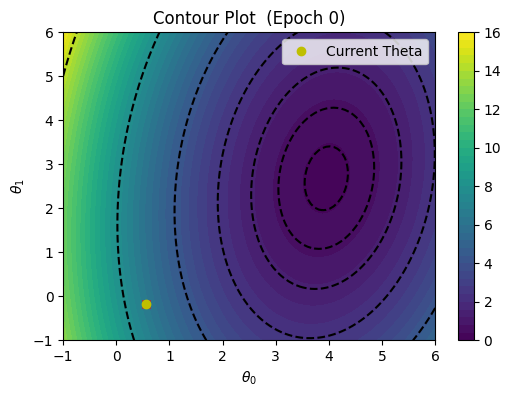

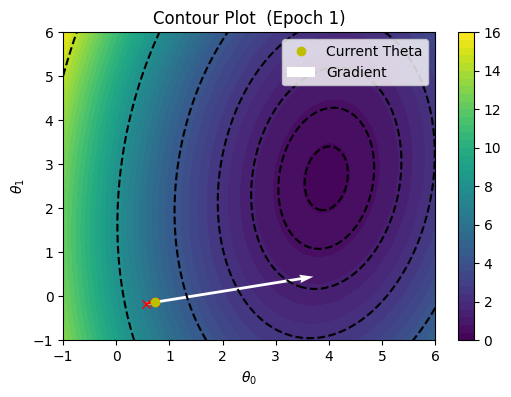

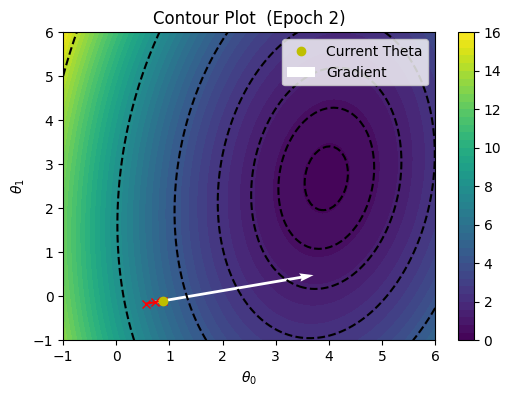

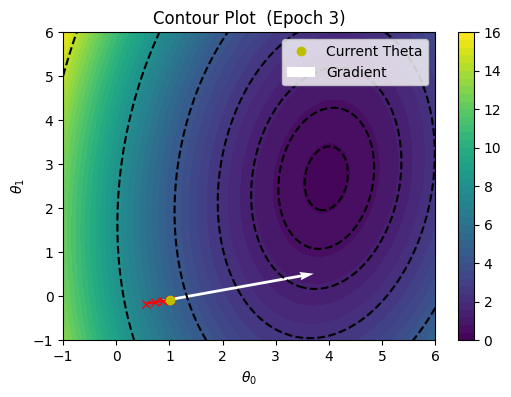

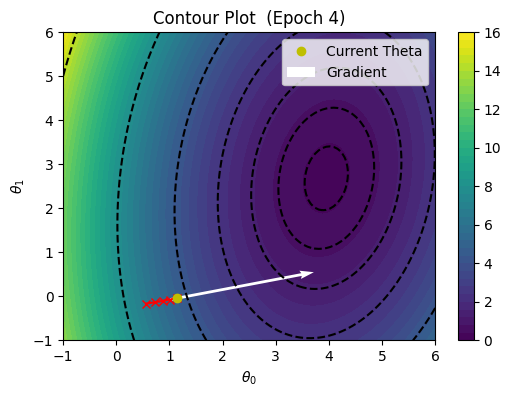

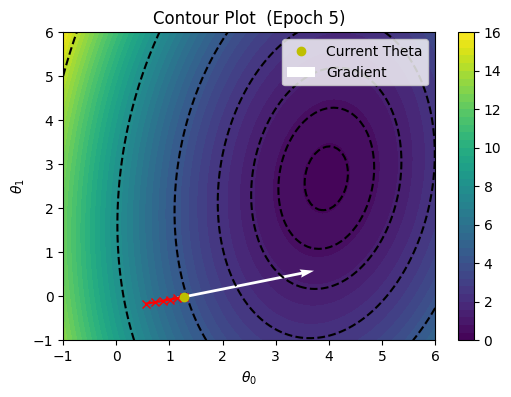

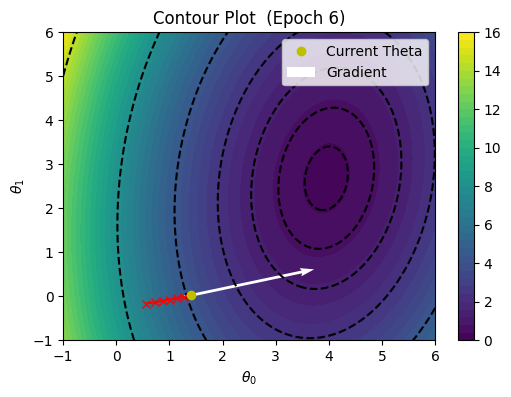

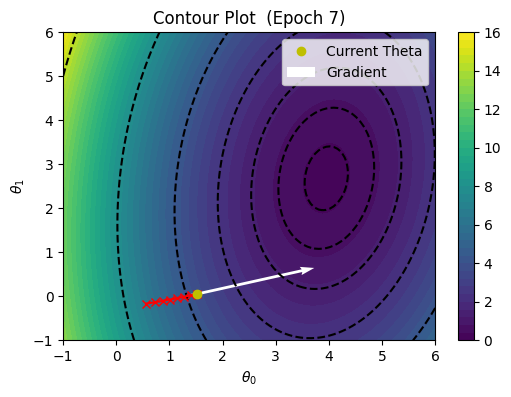

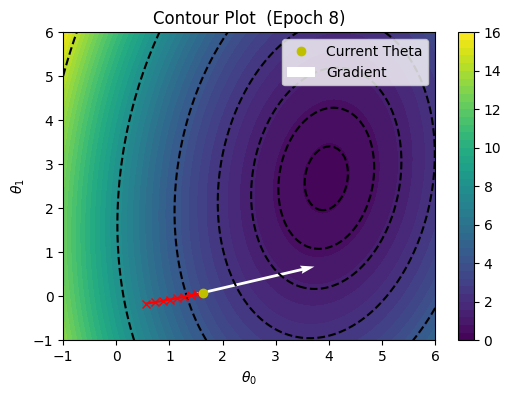

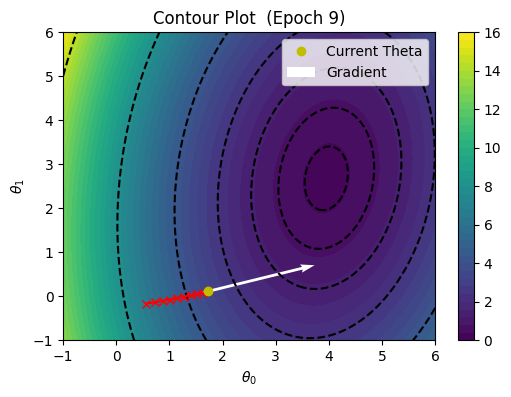

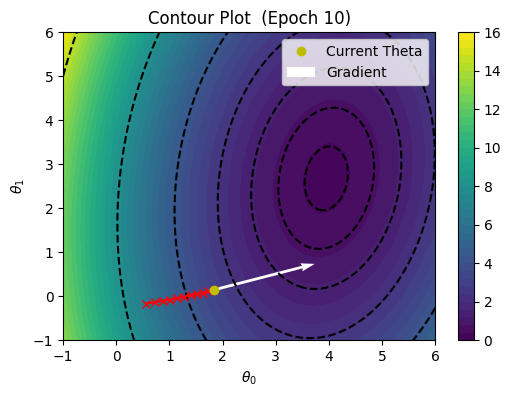

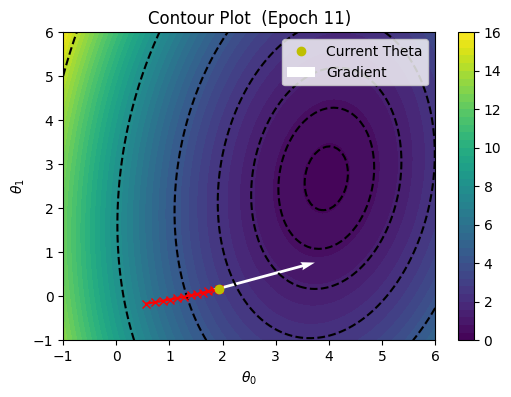

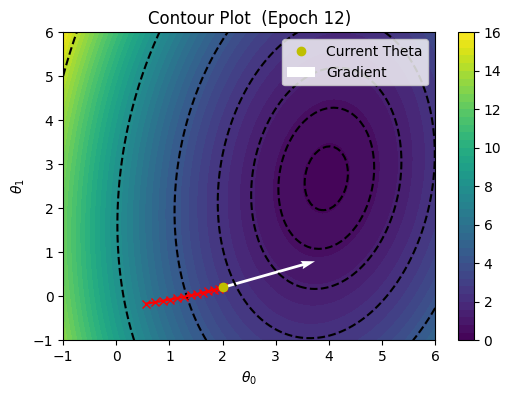

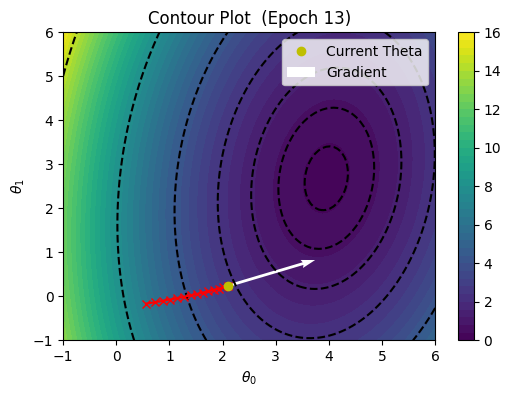

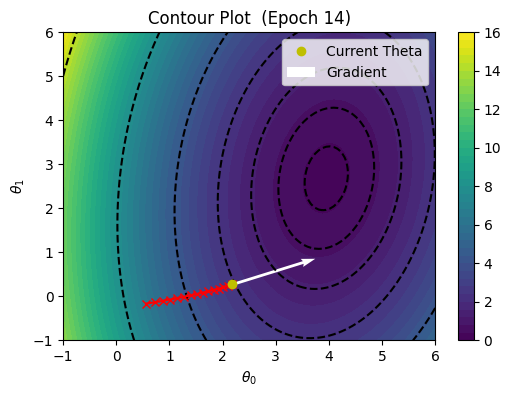

/var/folders/9k/9h2n21dd4vv6jtm6tcgbk9f40000gn/T/ipykernel_1156/3956282025.py:34: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


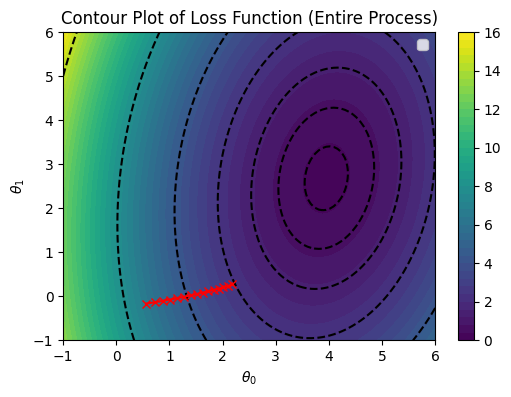

Mini-Batch Gradient Descent






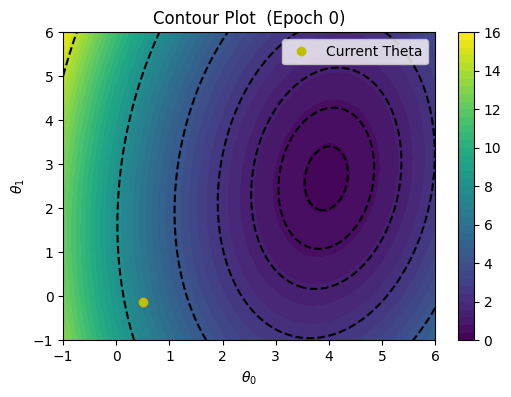

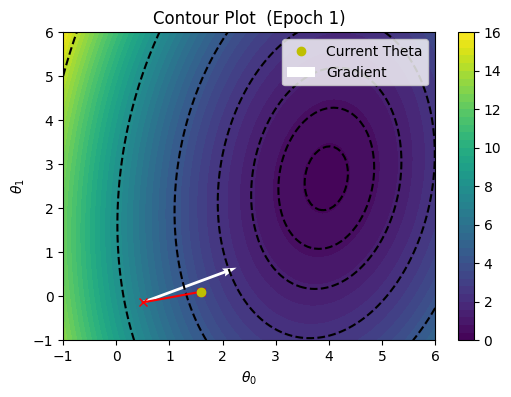

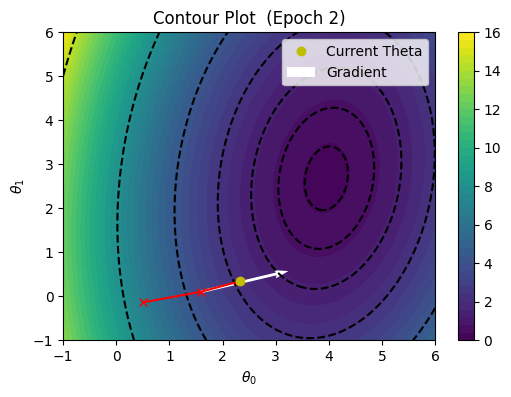

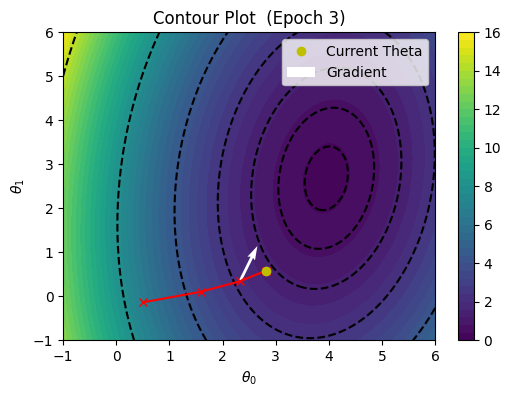

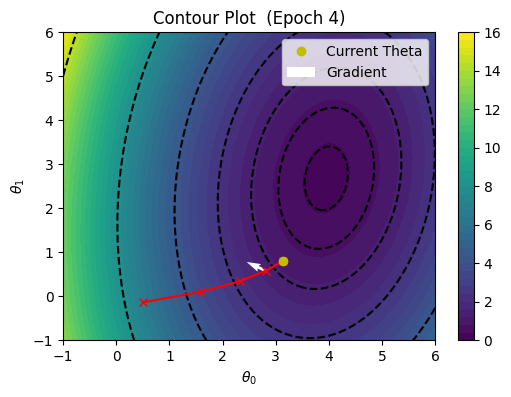

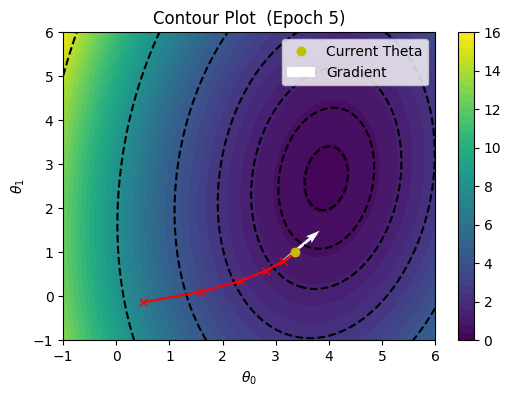

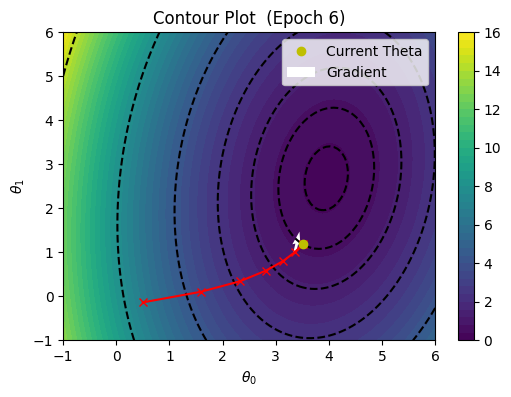

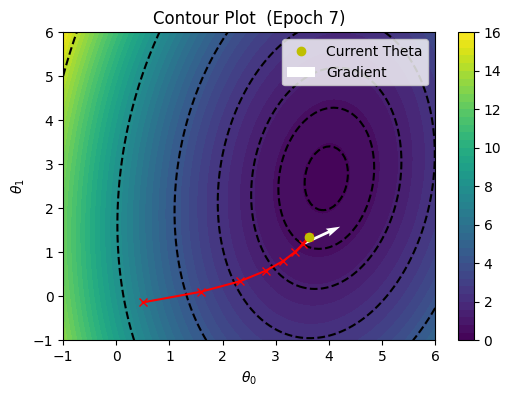

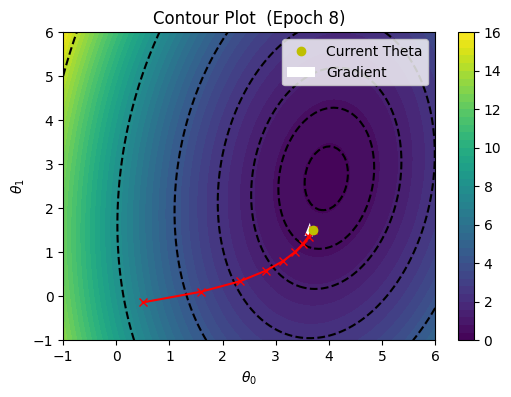

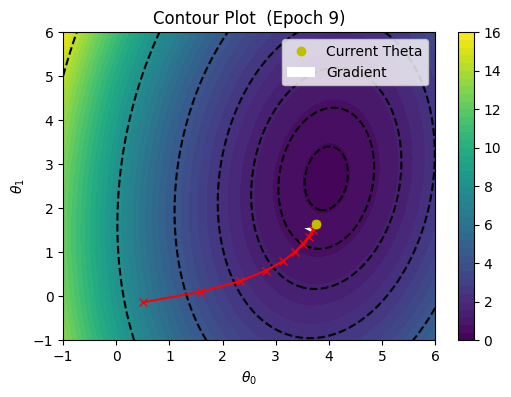

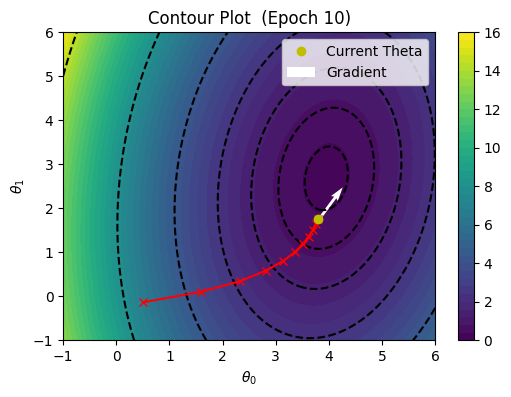

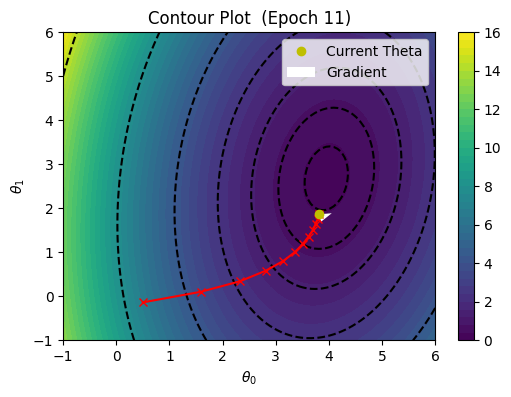

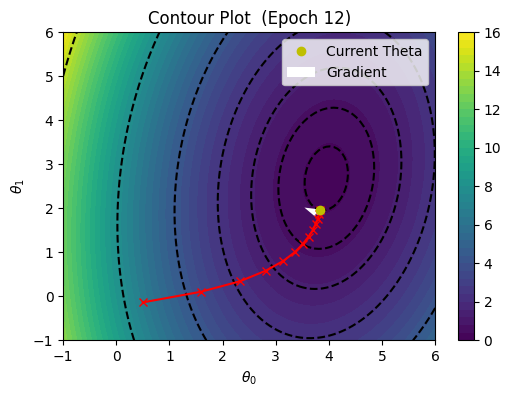

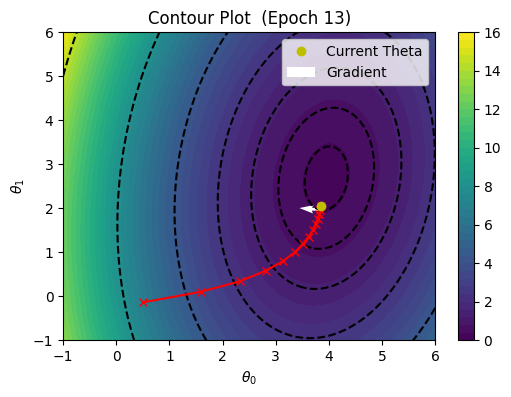

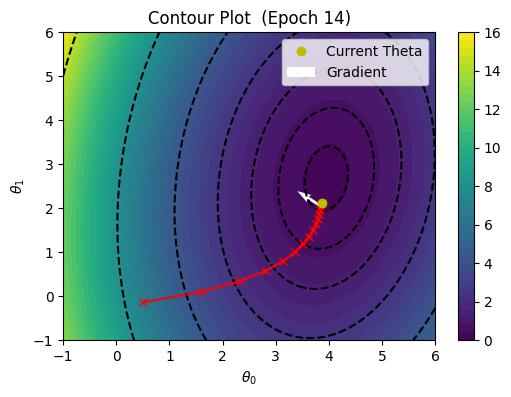

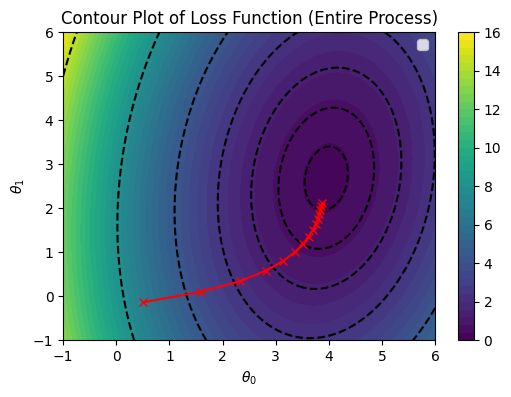

Stochastic Gradient Descent






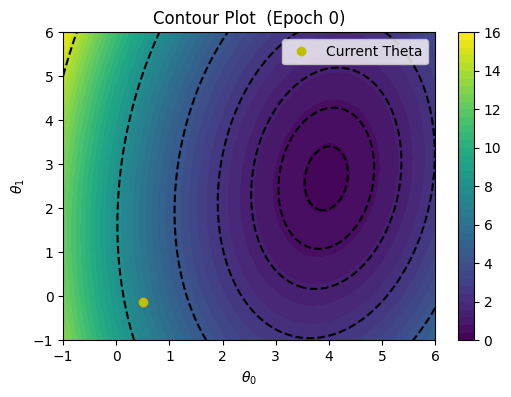

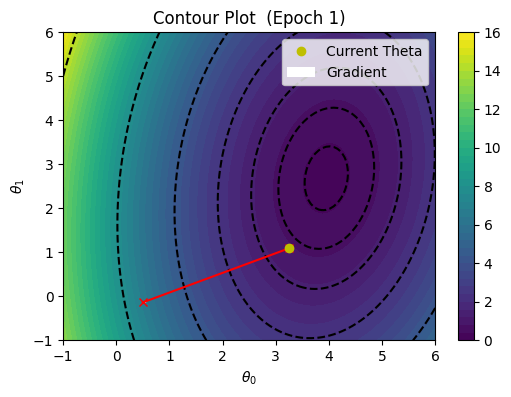

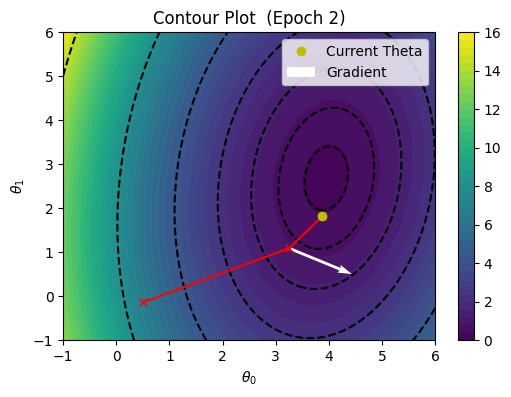

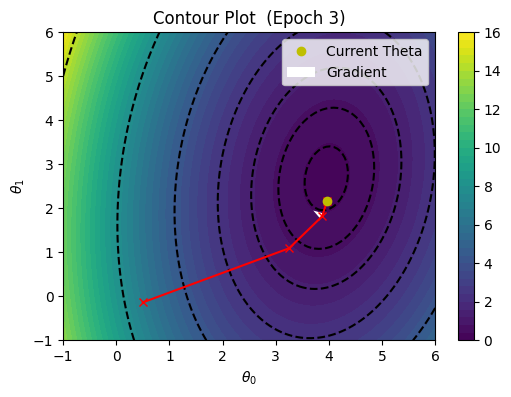

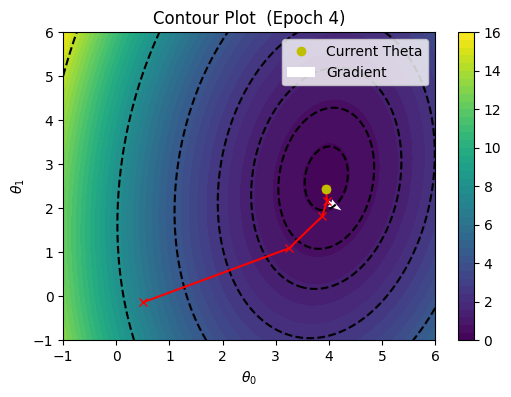

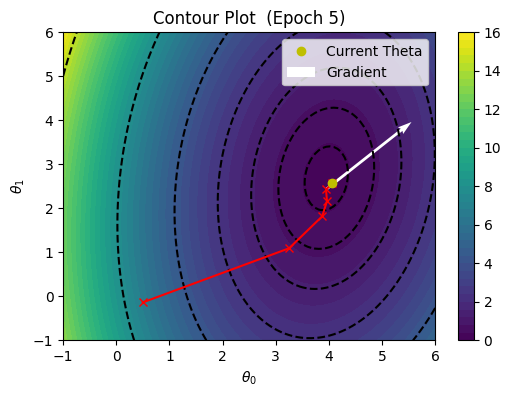

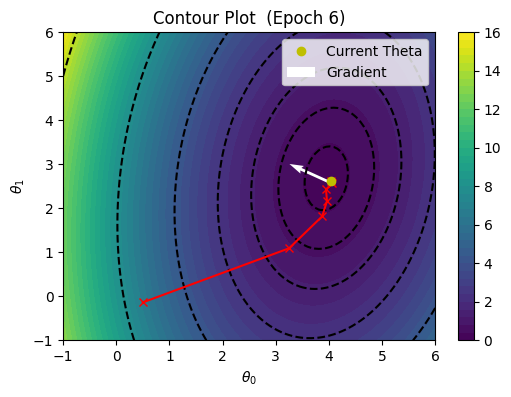

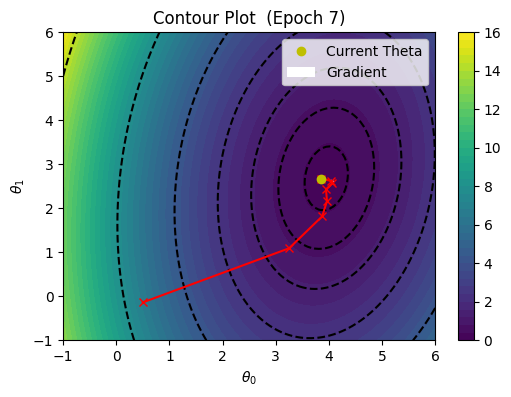

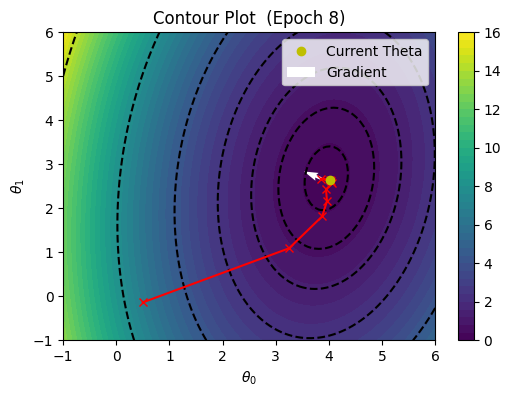

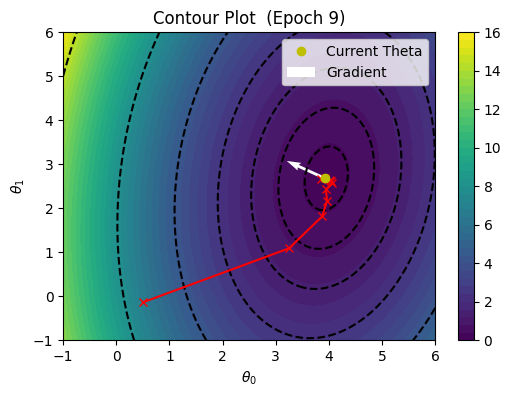

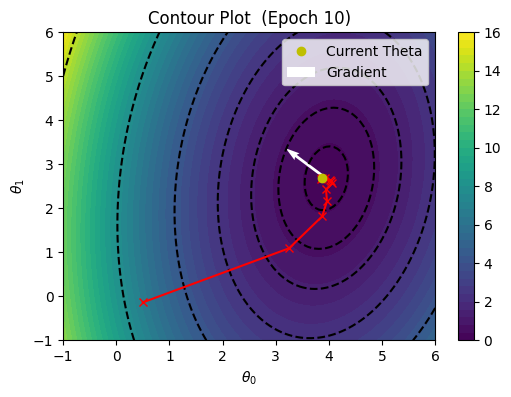

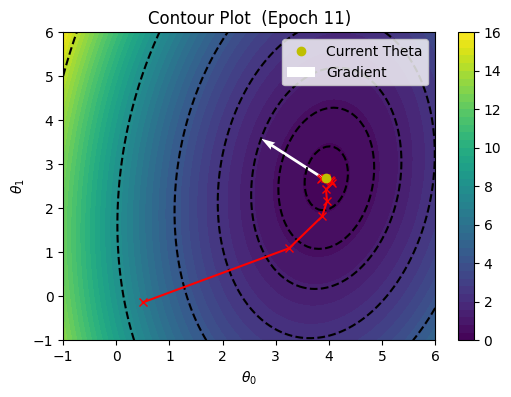

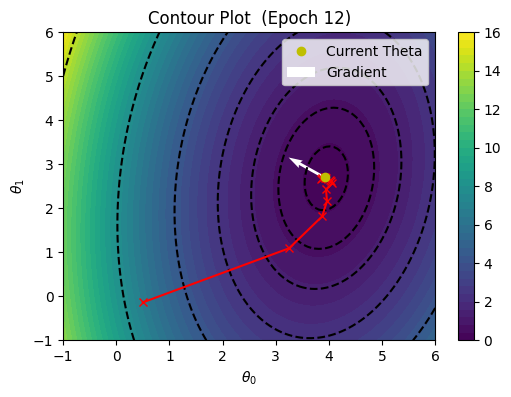

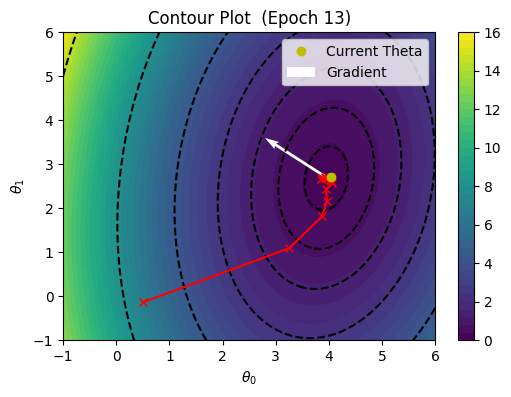

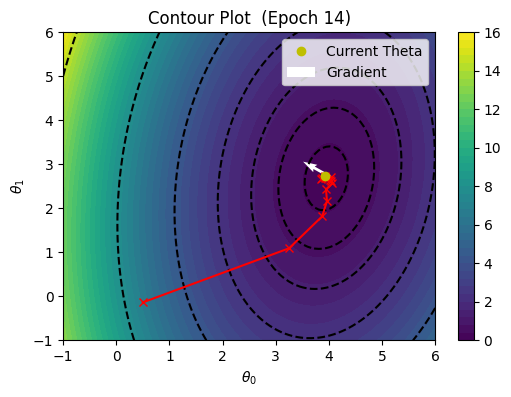

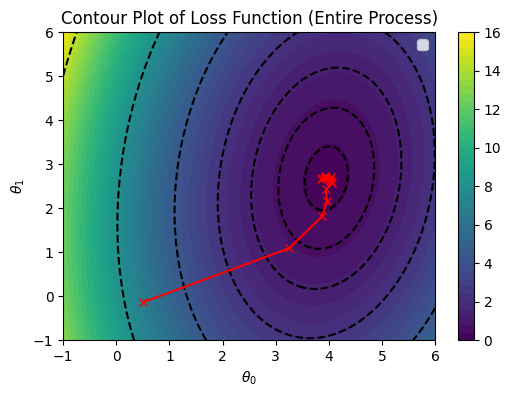

In [10]:

X = np.c_[np.ones(num_samples), x1] 
y = y.reshape(-1, 1)  

# Compute optimal theta using the normal equation
theta_optimal = np.linalg.inv(X.T @ X) @ X.T @ y
optimal_loss = np.mean((X @ theta_optimal - y) ** 2) / 2

# Gradient Descent Function
def full_batch_gradient_descent(X, y, alpha=0.05, epsilon=1e-3, max_iter=15):
    m, n = X.shape
    theta = np.random.randn(n, 1)
    loss_history = []
    theta_history = []
    gradient_history = []
    iterations = 0
    
    for epoch in range(max_iter):
        # Compute predictions
        predictions = X @ theta      
        # Compute loss
        loss = np.mean((predictions - y) ** 2) / 2      
        # Compute gradient
        gradient = X.T @ (predictions - y) / m    
        # Update theta
        theta -= alpha * gradient   
      
        # Store values
        loss_history.append(loss)
        theta_history.append(theta.flatten())
        gradient_history.append(gradient.flatten())
        iterations += 1
          # Plot contour for current epoch
        plot_contour(X, y, theta_history, gradient, epoch, max_iter)
        
        # Check stopping criterion
        if abs(loss - optimal_loss) < epsilon:
            break
    
    # Plot contour for entire process
    plot_contour(X, y, theta_history, None, 'Entire Process', max_iter)
    
    return {
        'epochs': epoch + 1,
        'iterations': iterations,
        'theta': np.array(theta_history),
        'gradients': np.array(gradient_history),
        'loss': np.array(loss_history),
        'optimal_loss': optimal_loss
    }




def mini_batch_gradient_descent(X, y, theta, batch_size=5, alpha=0.05, epsilon=1e-3, max_iter=15):
    m, n = X.shape
    loss_history = []
    theta_history_mb = []
    gradient_history = []
    iterations = 0
    
    for epoch in range(max_iter):
        indices = np.random.permutation(m)
        X_shuffled = X[indices]
        y_shuffled = y[indices]

        theta_history_mb.append(theta.flatten())
        
        for i in range(0, m, batch_size):
            X_batch = X_shuffled[i:i + batch_size]
            y_batch = y_shuffled[i:i + batch_size]
            
            predictions = X_batch @ theta
            loss = np.mean((predictions - y_batch) ** 2) / 2
            gradient = X_batch.T @ (predictions - y_batch) / len(X_batch)
            theta -= alpha * gradient
            
            loss_history.append(loss)
            
            
            gradient_history.append(gradient.flatten())
            iterations += 1
        
        
        plot_contour(X, y, theta_history_mb, gradient, epoch, max_iter)
        
        if abs(loss - optimal_loss) < epsilon:
            break
    
    plot_contour(X, y, theta_history_mb, None, 'Entire Process', max_iter)
    
    return {
        'epochs': epoch + 1,
        'iterations': iterations,
        'theta': np.array(theta_history_mb),
        'gradients': np.array(gradient_history),
        'loss': np.array(loss_history),
        'optimal_loss': optimal_loss
    }




def stochastic_gradient_descent(X, y, theta, alpha=0.05, epsilon=1e-3, max_iter=15):
    m, n = X.shape
    loss_history = []
    theta_history_sgd = []
    gradient_history = []
    iterations = 0
    
    for epoch in range(max_iter):
        indices = np.random.permutation(m)
        X_shuffled = X[indices]
        y_shuffled = y[indices]
        theta_history_sgd.append(theta.flatten())
        for i in range(m):
            X_i = X_shuffled[i:i + 1]
            y_i = y_shuffled[i:i + 1]

            predictions = X_i @ theta
            loss = np.mean((predictions - y_i) ** 2) / 2
            gradient = X_i.T @ (predictions - y_i)
            theta -= alpha * gradient
            
            loss_history.append(loss)
            # theta_history.append(theta.flatten())
            gradient_history.append(gradient.flatten())
            iterations += 1

        plot_contour(X, y, theta_history_sgd, gradient, epoch, max_iter)
        
        if abs(loss - optimal_loss) < epsilon:
            break
    
    plot_contour(X, y, theta_history_sgd, None, 'Entire Process', max_iter)
    
    return {
        'epochs': epoch + 1,
        'iterations': iterations,
        'theta': np.array(theta_history_sgd),
        'gradients': np.array(gradient_history),
        'loss': np.array(loss_history),
        'optimal_loss': optimal_loss
    }


print("\n\n\n\n", "Full-Batch Gradient Descent","\n\n\n\n")
results = full_batch_gradient_descent(X, y)
print("Mini-Batch Gradient Descent""\n\n\n\n")
results_mb = mini_batch_gradient_descent(X, y, np.array([[ 0.49671415],
 [-0.1382643 ]]))
print("Stochastic Gradient Descent""\n\n\n\n")
results_sgd = stochastic_gradient_descent(X, y, np.array([[ 0.49671415],
 [-0.1382643 ]]))









In [12]:
print("Full-Batch GD - Number of epochs:", results['epochs'])
print("Full-Batch GD - Number of iterations:", results['iterations'])
print("Full-Batch GD - Final theta values:", results['theta'][-1])
print("Full-Batch GD - Final loss:", results['loss'][-1])
print("Full-Batch GD - Optimal loss:", results['optimal_loss'])
print("\n\n")
print("Mini-Batch GD - Number of epochs:", results_mb['epochs'])
print("Mini-Batch GD - Number of iterations:", results_mb['iterations'])
print("Mini-Batch GD - Final theta values:", results_mb['theta'][-1])
print("Mini-Batch GD - Final loss:", results_mb['loss'][-1])
print("Mini-Batch GD - Optimal loss:", results_mb['optimal_loss'])
print("\n\n")
print("SGD - Number of epochs:", results_sgd['epochs'])
print("SGD - Number of iterations:", results_sgd['iterations'])
print("SGD - Final theta values:", results_sgd['theta'][-1])
print("SGD - Final loss:", results_sgd['loss'][-1])
print("SGD - Optimal loss:", results_sgd['optimal_loss'])
print("\n\n")

Full-Batch GD - Number of epochs: 15
Full-Batch GD - Number of iterations: 15
Full-Batch GD - Final theta values: [2.18471634 0.26875847]
Full-Batch GD - Final loss: 2.5665768379946163
Full-Batch GD - Optimal loss: 0.2978770782866659



Mini-Batch GD - Number of epochs: 15
Mini-Batch GD - Number of iterations: 120
Mini-Batch GD - Final theta values: [3.86816621 2.11841612]
Mini-Batch GD - Final loss: 0.49719466563072723
Mini-Batch GD - Optimal loss: 0.2978770782866659



SGD - Number of epochs: 15
SGD - Number of iterations: 600
SGD - Final theta values: [3.91946151 2.72365769]
SGD - Final loss: 0.13398287852491525
SGD - Optimal loss: 0.2978770782866659





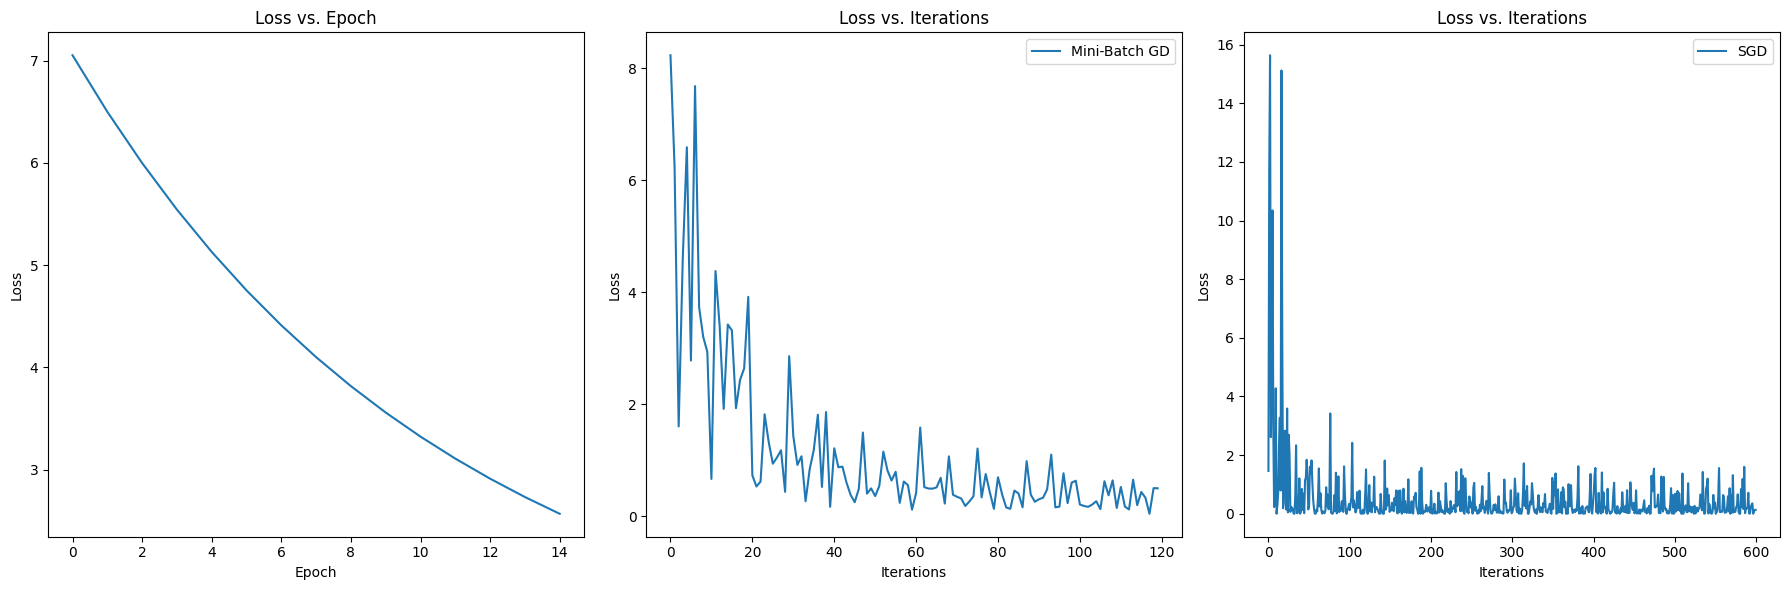

In [13]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
# Loss vs. Epoch Plot 
axes[0].plot(results['loss'])
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].set_title('Loss vs. Epoch')

# Loss vs. Iterations for Mini-Batch GD Plot 
axes[1].plot(results_mb['loss'], label='Mini-Batch GD')
axes[1].set_xlabel('Iterations')
axes[1].set_ylabel('Loss')
axes[1].set_title('Loss vs. Iterations')
axes[1].legend()

# Loss vs. Iterations for SGD Plot 
axes[2].plot(results_sgd['loss'], label='SGD')
axes[2].set_xlabel('Iterations')
axes[2].set_ylabel('Loss')
axes[2].set_title('Loss vs. Iterations')
axes[2].legend()

plt.tight_layout()
plt.show()


#
#
#
#
#
#

 ### Implement gradient descent with momentum for the dataset. Visualize the convergence process for 15 steps. Compare the average number of steps taken with gradient descent (for variants full batch and stochastic) with momentum to that of vanilla gradient descent to converge to an ϵ -neighborhood for both dataset. Choose ϵ = 0.001. Write down your observations. Show the contour plots for different epochs for momentum implementation. Specifically, show all the vectors: gradient, current value of theta, momentum, etc.

In [14]:
def full_batch_gradient_descent_momentum(X, y,theta,  alpha=0.05, beta=0.9, epsilon=1e-3, max_iter=1000):
    m, n = X.shape
    # theta = np.random.randn(n, 1)
    velocity = np.zeros((n, 1))  # Initialize velocity
    loss_history = []
    iterations = 0
    
    for epoch in range(max_iter):
        predictions = X @ theta
        loss = np.mean((predictions - y) ** 2) / 2
        gradient = X.T @ (predictions - y) / m
        
        # Update velocity
        velocity = beta * velocity + (1 - beta) * gradient
        theta -= alpha * velocity  # Update theta using momentum
        
        loss_history.append(loss)
        iterations += 1
        
        if abs(loss - optimal_loss) < epsilon:
            break
    
    return {
        'epochs': epoch + 1,
        'iterations': iterations,
        'loss': np.array(loss_history),
        'optimal_loss': optimal_loss
    }


def stochastic_gradient_descent_momentum(X, y,theta,  alpha=0.05, beta=0.9, epsilon=1e-3, max_iter=1000):
    m, n = X.shape
    # theta = np.random.randn(n, 1)
    velocity = np.zeros((n, 1))  # Initialize velocity
    loss_history = []
    iterations = 0
    
    for epoch in range(max_iter):
        indices = np.random.permutation(m)
        X_shuffled = X[indices]
        y_shuffled = y[indices]

        for i in range(m):
            X_i = X_shuffled[i:i + 1]
            y_i = y_shuffled[i:i + 1]

            predictions = X_i @ theta
            loss = np.mean((predictions - y_i) ** 2) / 2
            gradient = X_i.T @ (predictions - y_i)
            
            # Update velocity
            velocity = beta * velocity + (1 - beta) * gradient
            theta -= alpha * velocity  # Update theta using momentum
            
            loss_history.append(loss)
            iterations += 1

        average_loss = np.mean(loss_history[-m:])
        
        if abs(average_loss - optimal_loss) < epsilon:
            break
    
    return {
        'epochs': epoch + 1,
        'iterations': iterations,
        'loss': np.array(loss_history),
        'optimal_loss': optimal_loss
    }


results_full_batch_momentum = []
results_sgd_momentum = []

for _ in range(num_trials):
    # Initialize theta for each trial
    init_theta = np.array([[0.0], [0.0]])
    
    # Run full-batch gradient descent with momentum
    result_full_batch_momentum = full_batch_gradient_descent_momentum(X, y, init_theta, alpha=0.01, beta=0.9, epsilon=1e-3, max_iter=2000)
    results_full_batch_momentum.append(result_full_batch_momentum)
    
    # Run stochastic gradient descent with momentum
    result_sgd_momentum = stochastic_gradient_descent_momentum(X, y, init_theta, alpha=0.01, beta=0.9, epsilon=1e-3, max_iter=2000)
    results_sgd_momentum.append(result_sgd_momentum)

# Print results for momentum methods
print("Full-Batch Gradient Descent with Momentum Results:")
for trial, result in enumerate(results_full_batch_momentum, 1):
    print(f"Trial {trial}: Epochs = {result['epochs']}, Iterations = {result['iterations']}, Final Loss = {result['loss'][-1]}")

print("\nStochastic Gradient Descent with Momentum Results:")
for trial, result in enumerate(results_sgd_momentum, 1):
    print(f"Trial {trial}: Epochs = {result['epochs']}, Iterations = {result['iterations']}, Final Loss = {result['loss'][-1]}")

# Calculate average epochs and iterations for both methods
epochs_fb_momentum = [result['epochs'] for result in results_full_batch_momentum]
average_epochs_fb_momentum = np.mean(epochs_fb_momentum)
print("Average Epochs (Full-Batch with Momentum):", average_epochs_fb_momentum)

iterations_fb_momentum = [result['iterations'] for result in results_full_batch_momentum]
average_iterations_fb_momentum = np.mean(iterations_fb_momentum)
print("Average Iterations (Full-Batch with Momentum):", average_iterations_fb_momentum)

epochs_sgd_momentum = [result['epochs'] for result in results_sgd_momentum]
average_epochs_sgd_momentum = np.mean(epochs_sgd_momentum)
print("Average Epochs (Stochastic with Momentum):", average_epochs_sgd_momentum)

iterations_sgd_momentum = [result['iterations'] for result in results_sgd_momentum]
average_iterations_sgd_momentum = np.mean(iterations_sgd_momentum)
print("Average Iterations (Stochastic with Momentum):", average_iterations_sgd_momentum)


Full-Batch Gradient Descent with Momentum Results:
Trial 1: Epochs = 1173, Iterations = 1173, Final Loss = 0.2988723848094071
Trial 2: Epochs = 1173, Iterations = 1173, Final Loss = 0.2988723848094071
Trial 3: Epochs = 1173, Iterations = 1173, Final Loss = 0.2988723848094071
Trial 4: Epochs = 1173, Iterations = 1173, Final Loss = 0.2988723848094071
Trial 5: Epochs = 1173, Iterations = 1173, Final Loss = 0.2988723848094071
Trial 6: Epochs = 1173, Iterations = 1173, Final Loss = 0.2988723848094071
Trial 7: Epochs = 1173, Iterations = 1173, Final Loss = 0.2988723848094071
Trial 8: Epochs = 1173, Iterations = 1173, Final Loss = 0.2988723848094071
Trial 9: Epochs = 1173, Iterations = 1173, Final Loss = 0.2988723848094071
Trial 10: Epochs = 1173, Iterations = 1173, Final Loss = 0.2988723848094071
Trial 11: Epochs = 1173, Iterations = 1173, Final Loss = 0.2988723848094071
Trial 12: Epochs = 1173, Iterations = 1173, Final Loss = 0.2988723848094071
Trial 13: Epochs = 1173, Iterations = 1173, Fi

In [15]:
def full_batch_gradient_descent_momentum(X, y, alpha=0.05, epsilon=1e-3, max_iter=15, beta=0.9):
    m, n = X.shape
    theta = np.random.randn(n, 1)
    loss_history = []
    theta_history = []
    gradient_history = []
    iterations = 0
    v = np.zeros_like(theta)  # Initialize velocity

    for epoch in range(max_iter):
        # Compute predictions
        predictions = X @ theta      
        # Compute loss
        loss = np.mean((predictions - y) ** 2) / 2      
        # Compute gradient
        gradient = X.T @ (predictions - y) / m    
        
        # Update velocity
        v = beta * v + (1 - beta) * gradient
        # Update theta
        theta -= alpha * v   
      
        # Store values
        loss_history.append(loss)
        theta_history.append(theta.flatten())
        gradient_history.append(gradient.flatten())
        iterations += 1
        
        # Plot contour for current epoch
        plot_contour(X, y, theta_history, gradient, epoch, max_iter)
        
        # Check stopping criterion
        if abs(loss - optimal_loss) < epsilon:
            break
    
    # Plot contour for entire process
    plot_contour(X, y, theta_history, None, 'Entire Process', max_iter)
    
    return {
        'epochs': epoch + 1,
        'iterations': iterations,
        'theta': np.array(theta_history),
        'gradients': np.array(gradient_history),
        'loss': np.array(loss_history),
        'optimal_loss': optimal_loss
    }



def stochastic_gradient_descent_momentum(X, y, theta, alpha=0.05, epsilon=1e-3, max_iter=15, beta=0.9):
    m, n = X.shape
    loss_history = []
    theta_history_sgd = []
    gradient_history = []
    iterations = 0
    v = np.zeros_like(theta)  # Initialize velocity

    for epoch in range(max_iter):
        indices = np.random.permutation(m)
        X_shuffled = X[indices]
        y_shuffled = y[indices]
        theta_history_sgd.append(theta.flatten())

        for i in range(m):
            X_i = X_shuffled[i:i + 1]
            y_i = y_shuffled[i:i + 1]

            predictions = X_i @ theta
            loss = np.mean((predictions - y_i) ** 2) / 2
            gradient = X_i.T @ (predictions - y_i)
            
            # Update velocity
            v = beta * v + (1 - beta) * gradient
            # Update theta
            theta -= alpha * v
            
            loss_history.append(loss)
            gradient_history.append(gradient.flatten())
            iterations += 1

        plot_contour(X, y, theta_history_sgd, gradient, epoch, max_iter)
        
        if abs(loss - optimal_loss) < epsilon:
            break
    
    plot_contour(X, y, theta_history_sgd, None, 'Entire Process', max_iter)
    
    return {
        'epochs': epoch + 1,
        'iterations': iterations,
        'theta': np.array(theta_history_sgd),
        'gradients': np.array(gradient_history),
        'loss': np.array(loss_history),
        'optimal_loss': optimal_loss
    }






 Full-Batch Gradient Descent with Momentum 






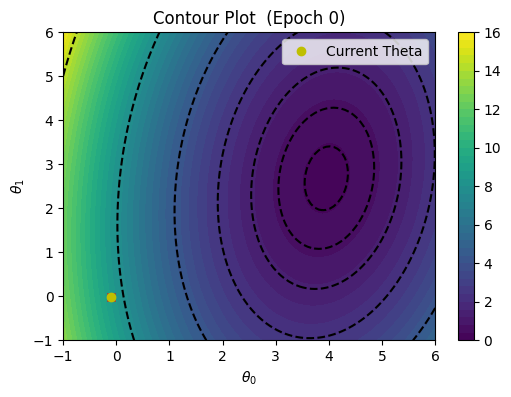

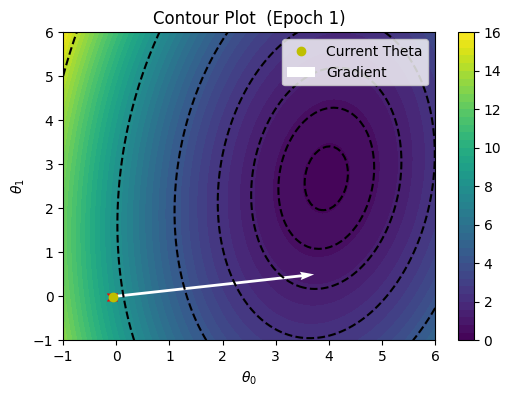

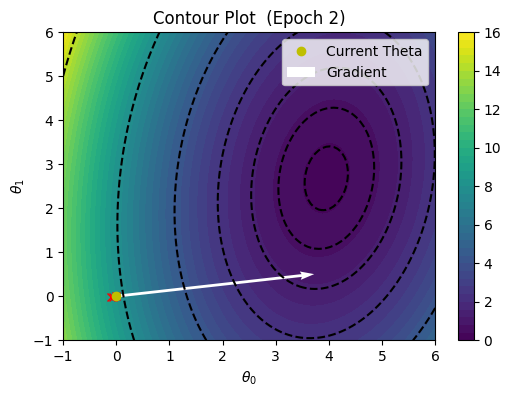

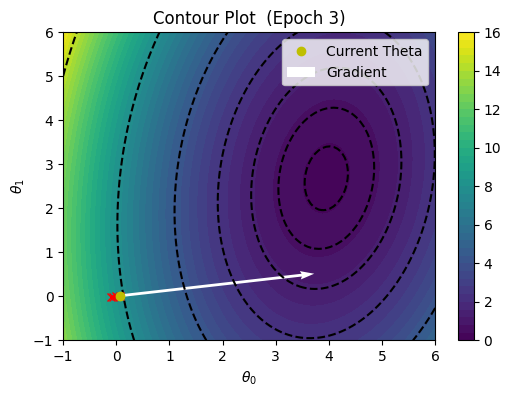

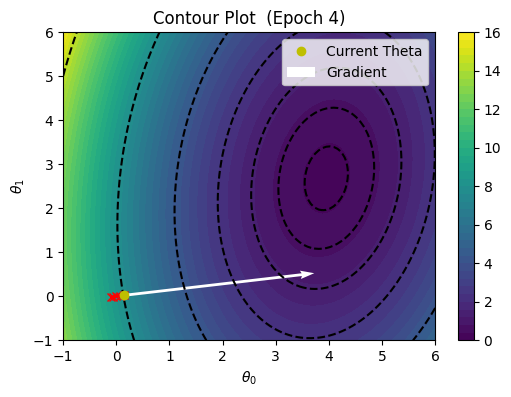

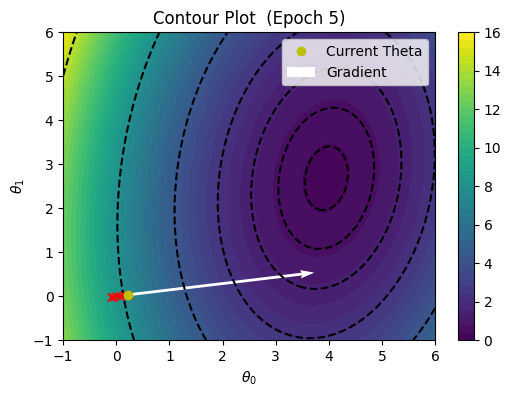

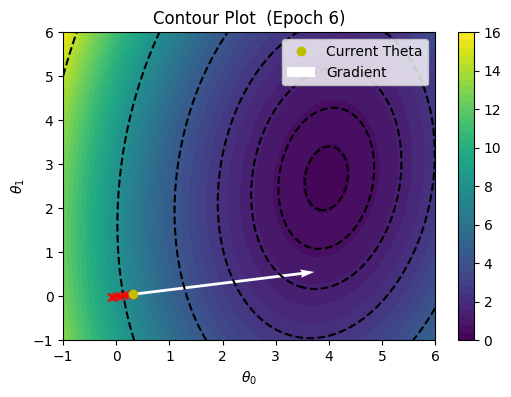

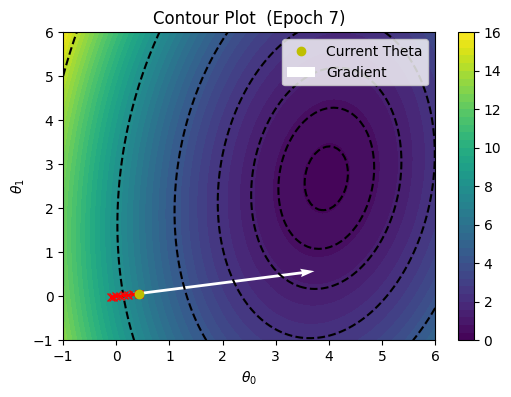

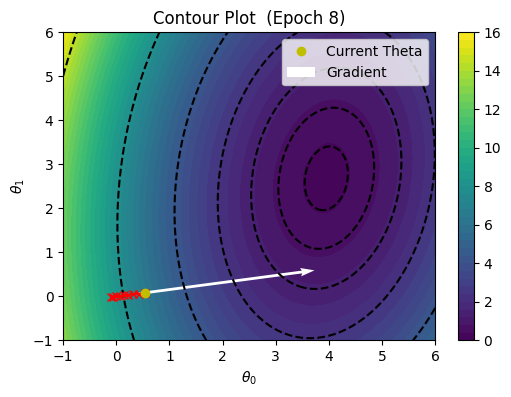

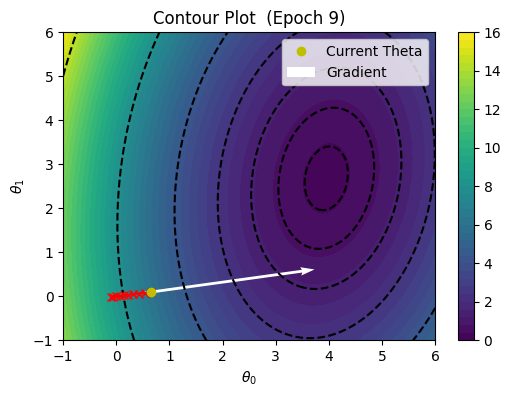

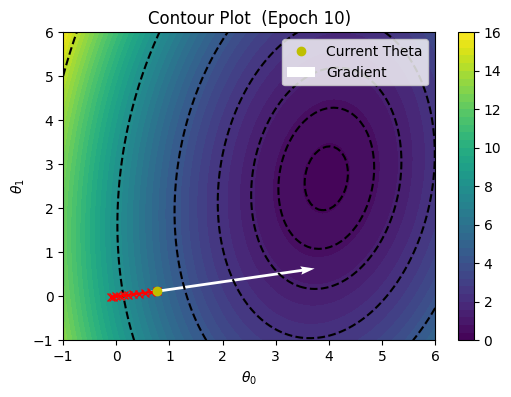

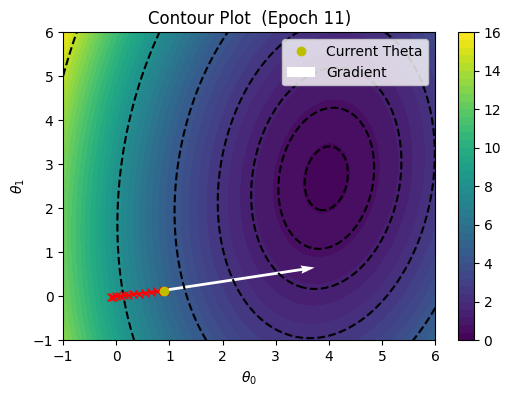

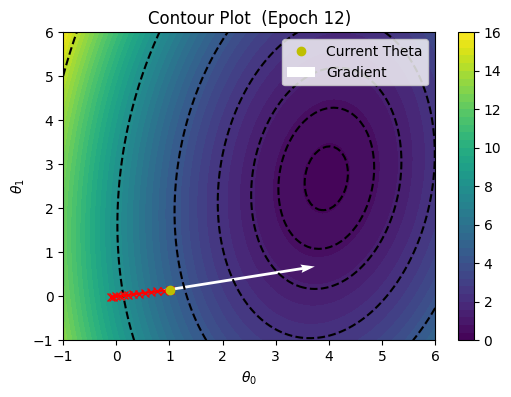

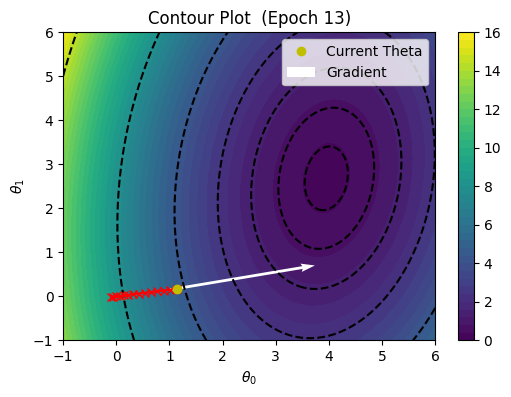

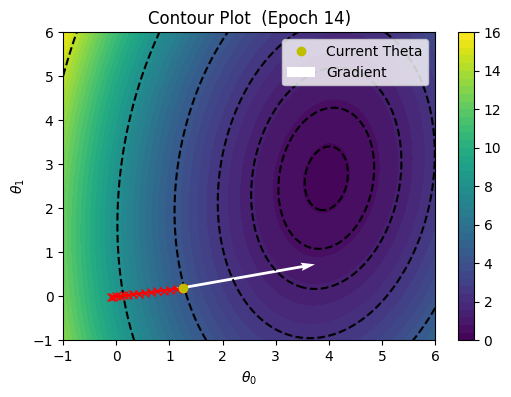

/var/folders/9k/9h2n21dd4vv6jtm6tcgbk9f40000gn/T/ipykernel_1156/3956282025.py:34: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


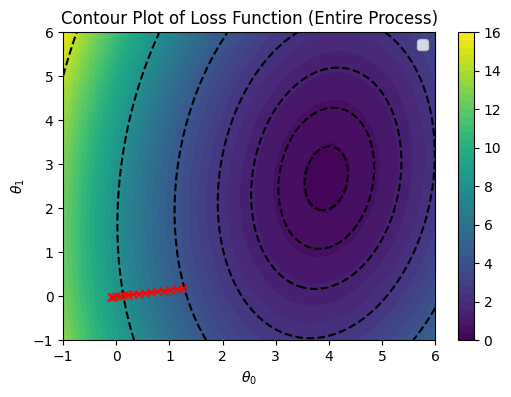

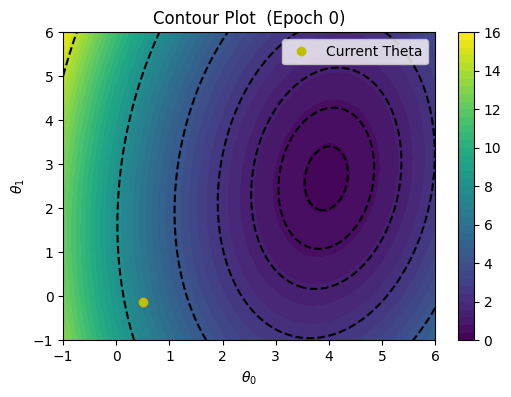

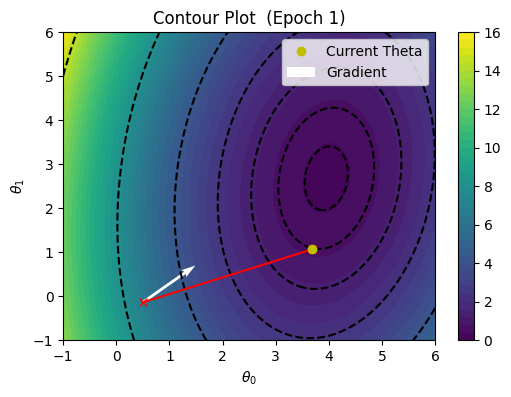

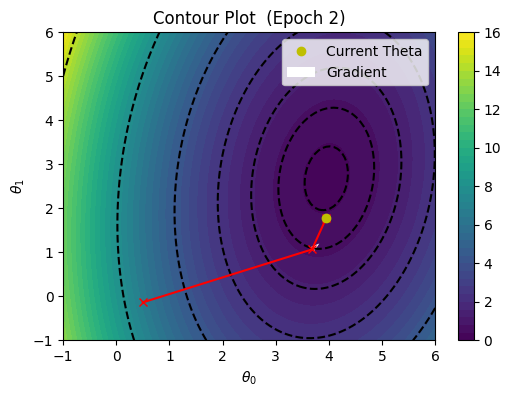

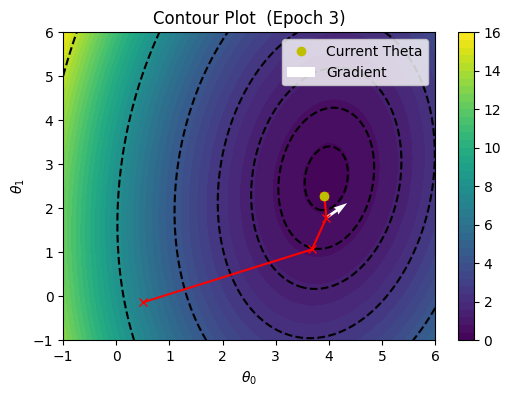

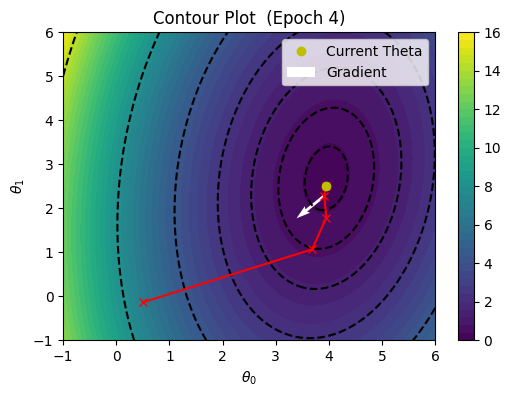

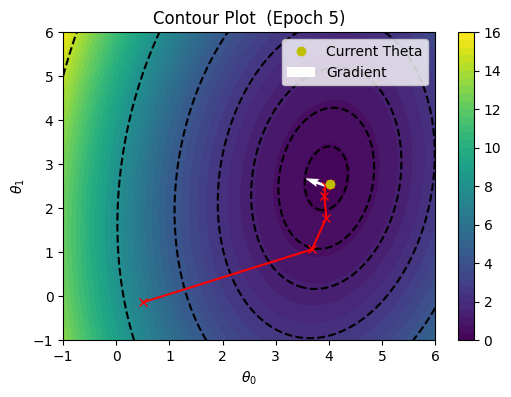

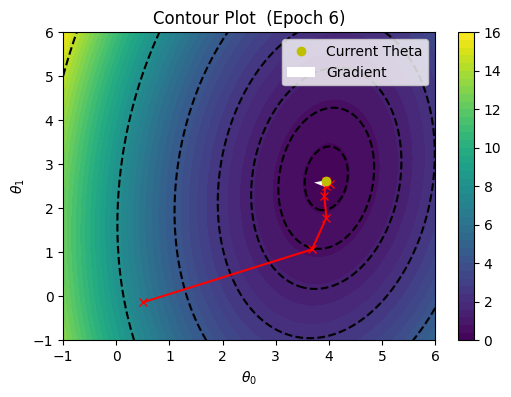

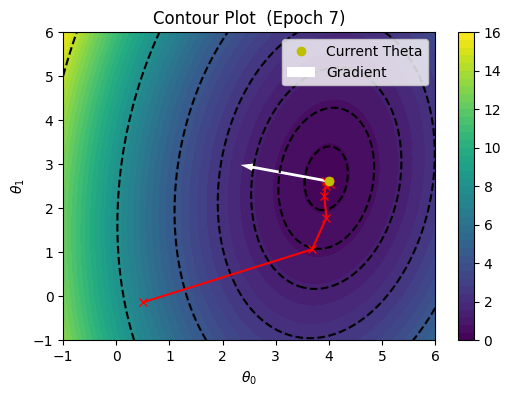

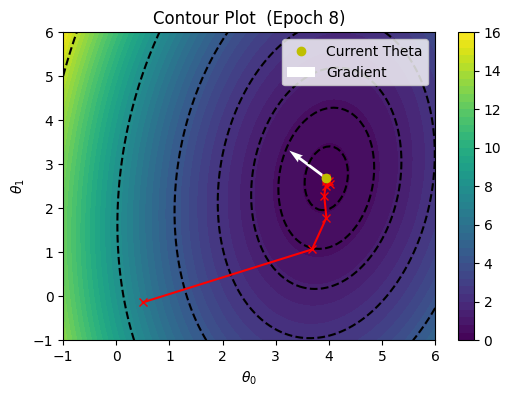

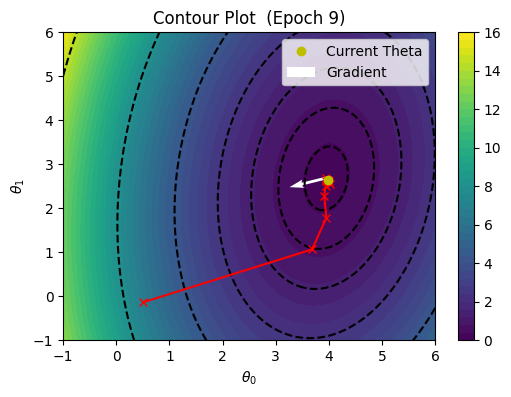

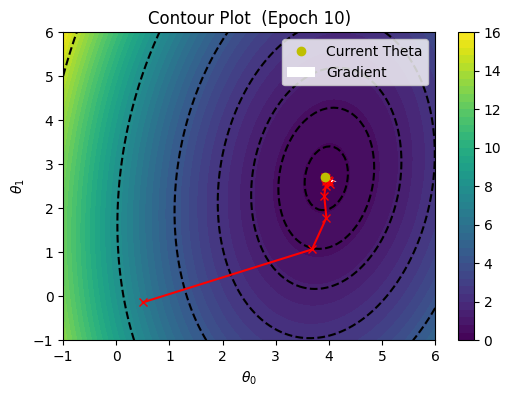

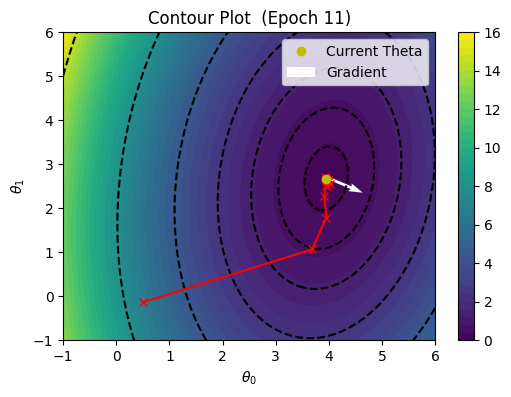

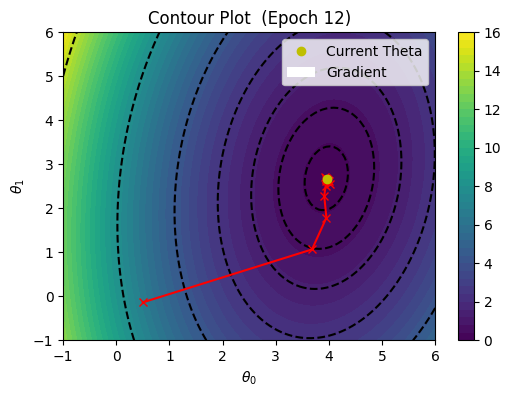

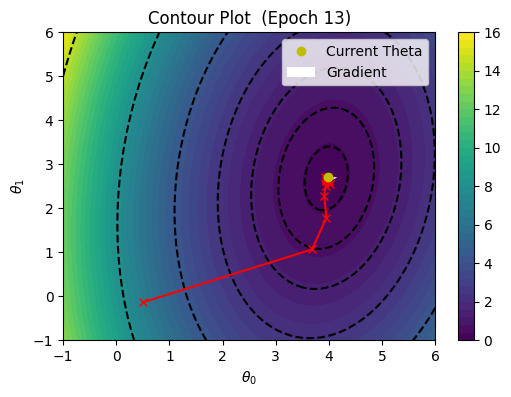

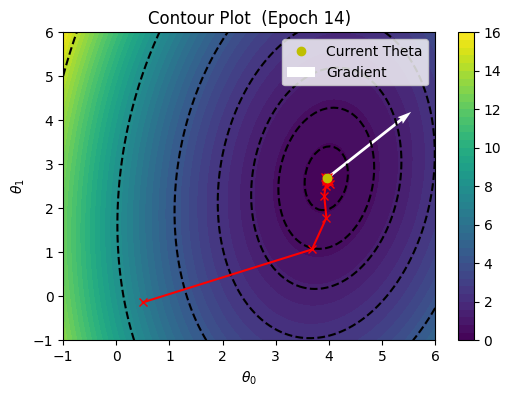

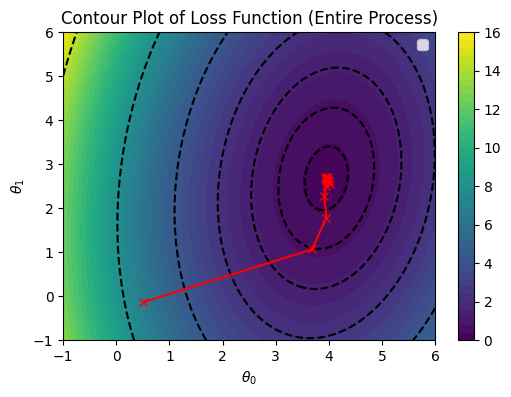

Stochastic Gradient Descent with Momentum 




Full-Batch GD with Momentum - Number of epochs: 15
Full-Batch GD with Momentum - Number of iterations: 15
Full-Batch GD with Momentum - Final theta values: [1.26210104 0.1924215 ]
Full-Batch GD with Momentum - Final loss: 4.654575575470486
Full-Batch GD with Momentum - Optimal loss: 0.2978770782866659



SGD with Momentum - Number of epochs: 15
SGD with Momentum - Number of iterations: 600
SGD with Momentum - Final theta values: [3.95590581 2.69459165]
SGD with Momentum - Final loss: 1.2140569021766516
SGD with Momentum - Optimal loss: 0.2978770782866659


In [16]:
print("\n\n\n\n", "Full-Batch Gradient Descent with Momentum","\n\n\n\n")
results_momentum = full_batch_gradient_descent_momentum(X, y)


results_sgd_momentum = stochastic_gradient_descent_momentum(X, y, np.array([[0.49671415], [-0.1382643]]))
print("Stochastic Gradient Descent with Momentum","\n\n\n\n")

# Print results
print("Full-Batch GD with Momentum - Number of epochs:", results_momentum['epochs'])
print("Full-Batch GD with Momentum - Number of iterations:", results_momentum['iterations'])
print("Full-Batch GD with Momentum - Final theta values:", results_momentum['theta'][-1])
print("Full-Batch GD with Momentum - Final loss:", results_momentum['loss'][-1])
print("Full-Batch GD with Momentum - Optimal loss:", results_momentum['optimal_loss'])
print("\n\n")
print("SGD with Momentum - Number of epochs:", results_sgd_momentum['epochs'])
print("SGD with Momentum - Number of iterations:", results_sgd_momentum['iterations'])
print("SGD with Momentum - Final theta values:", results_sgd_momentum['theta'][-1])
print("SGD with Momentum - Final loss:", results_sgd_momentum['loss'][-1])
print("SGD with Momentum - Optimal loss:", results_sgd_momentum['optimal_loss'])


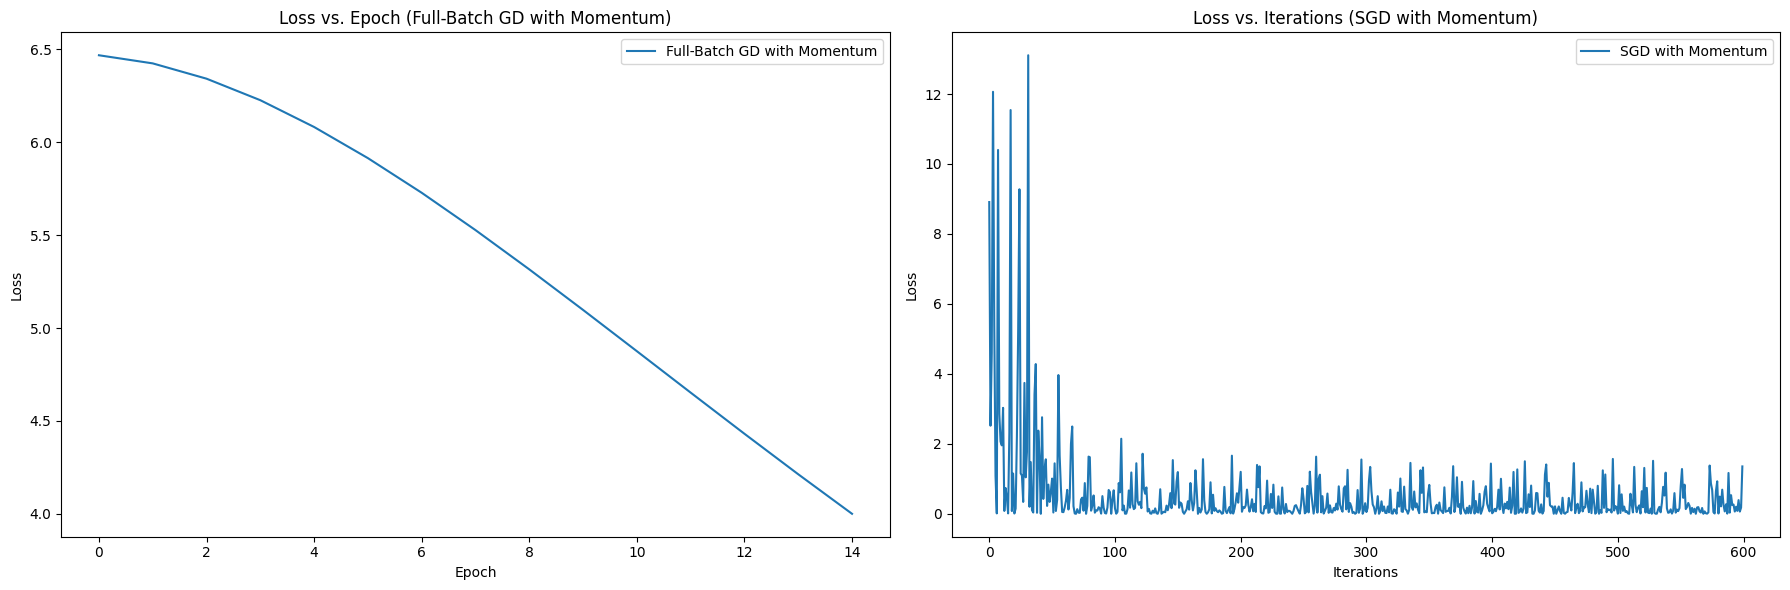

In [52]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Loss vs. Epoch Plot for Full-Batch GD with Momentum
axes[0].plot(results_momentum['loss'], label='Full-Batch GD with Momentum')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].set_title('Loss vs. Epoch (Full-Batch GD with Momentum)')
axes[0].legend()


# Loss vs. Iterations for SGD with Momentum
axes[1].plot(results_sgd_momentum['loss'], label='SGD with Momentum')
axes[1].set_xlabel('Iterations')
axes[1].set_ylabel('Loss')
axes[1].set_title('Loss vs. Iterations (SGD with Momentum)')
axes[1].legend()

plt.tight_layout()
plt.show()

#
### Using momentum in both methods led to faster convergence, smoother updates, and improved stability. However, the impact semms to be most pronounced in stochastic methods, which without momentum was not converging (taking more than 2000 iterations).This could be because the inherent noise can be effectively dampened, allowing for more reliable convergence. 
### Momentum helps accelerate gradient descent in the relevant direction and dampens oscillations. It does this by adding a fraction of the update vector of the past time step to the current update vector.